In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
%matplotlib inline

** Problem 1 **: 7 pts- Using

$$
\cos(x) = \sum_{j=0}^{\infty}\frac{(-1)^{j}}{(2j)!}x^{2j}, ~ \sin(x) = \sum_{j=0}^{\infty}\frac{(-1)^{j}}{(2j+1)!}x^{2j+1}
$$

and 

$$
\sin(2x) = 2\cos(x)\sin(x)
$$

derive a Taylor series for $\cos(x^{3})\sin(x^{3})$ around $x=0$.  Write a code which computes the Taylor series of $\cos(x^{3})\sin(x^{3})$ using recursion, vectorization, and a tolerance based while loop approach.(4pts)  On the interval $[0,\pi]$, plot the semi-log error in your approximation for tolerance values $10^{-4}$, $10^{-6}$, and $10^{-8}$. Label axes and provide a legend for your graph.  Describe your graphs and comment on any trends you observe.(3pts)

_Answer to Problem 1_

So, using 

$$
\cos(x^{3})\sin(x^{3}) = \frac{1}{2}\sin(2x^{3}), 
$$

we find 

$$
\cos(x^{3})\sin(x^{3}) = x^{3}\sum_{j=0}^{\infty}\frac{(-4x^{6})^{j}}{(2j+1)!}.
$$

Thus if we use the recursion relationship

$$
a_{j}(x) = \left\{\begin{array}{rl} \frac{-4x^{6}}{2j(2j+1)}a_{j-1}(x) & j\geq 1 \\ 1 & j=0 \end{array}\right.
$$

we can readily generate the code below.

In [49]:
def weird_sin(x,tol):
    tot = np.ones(x.size)
    aj = np.ones(x.size)
    uxv = -4.*x**6.
    jj = 1
    while np.max(np.abs(aj)):
        aj *= uxv/((2.*jj)*(2.*jj+1.))    
        tot += aj
        jj += 1
    return (x**3.)*tot

C:\Users\ccurtis\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: divide by zero encountered in log10


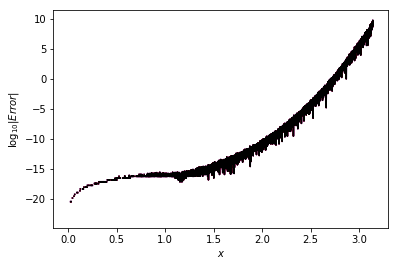

In [53]:
xvals = np.linspace(0.,np.pi,int(5e3))
yvalst = np.sin(2.*xvals**3.)/2.
tols = [1e-4,1e-6,1e-8]
cls = ['b','r','k']
for ll in xrange(0,len(tols)):
    yvalsc = weird_sin(xvals,tols[ll])
    evals = np.log10(np.abs(yvalsc-yvalst))
    plt.plot(xvals,evals,color=cls[ll])
plt.xlabel('$x$')
plt.ylabel('$\log_{10}|Error|$')

In this case, we see that all of the error curves for the different tolerance values collapse onto one another.  Moreover, we see that while the Taylor series is quite accurate for $0\leq x \leq 2.5$, after $x=2.5$, the accuracy degrades rapidly so that by $x=\pi$, our Taylor series does not give us a useful approximation at all.  

**Problem 2**: 7 pts- Another very important class of special functions are called the _Legendre Polynomials_, say $L_{n}(x)$, which are defined for non-negative integer $n$ via the series

$$
L_{n}(x) = \sum_{k=0}^{n}\frac{(n+k)!}{(k!)^{2}(n-k)!}\left(\frac{x-1}{2}\right)^{k}, ~ -1\leq x \leq 1.
$$

Using a `for`-loop, vectorized, recursive approach, write a function which computes the Legendre functions for any non-negative integer $n$ (4pts).  Make a plot showing $L_{n}(x)$ for $n=0,1,2,3,4$ simultaneously, using different colors for each different $n$.  The plot should have a legend as well as appropriately labeled axes.  (3pts)    

_Answer to Problem 2_

In [18]:
def legendre_func(x,n):
    tot = np.ones(x.size)
    ak = np.ones(x.size)
    xv = (x-np.ones(x.size))/2.
    for kk in xrange(1,int(n)+1):
        ak *= (n+kk)*(n-kk+1)*xv/kk**2.
        tot += ak
    return tot

nvals = np.array(range(0,5))
cls = ['r','b','g','k','y']
xvals = np.linspace(-1.,1.,int(1e3)+1)

for jj in xrange(0,nvals.size):
    lvals = legendre_func(xvals,nvals[jj])
    plt.plot(xvals,lvals,color=cls[jj],label='$L_{{{}}}(x)$'.format(nvals[jj]))

plt.xlabel('x')
plt.title('The Legendre Functions')
plt.legend(loc=(.81,.025))

** Problem 3 **: 5 pts - Using a for loop based approach, write a program which finds the function $f(n)$ where 

$$
f(n) = \frac{1}{n}\sum_{j=1}^{n} \left(\left(\frac{j}{n}\right)^{5} + 6\left(\frac{j}{n}\right)^{3} \right)
$$

for any positive integer n (2pts).  Generate a labeled plot of the results of your function for $1\leq n \leq 1000$, where $n$ will be on the $x$-axis, while the results of your function will appear on the $y$-axis.  Describe any trends you see from your graph. (3pts)      

_Answer to Problem 3_

In [20]:
def fun_slow(n):
    tot = 0.
    for jj in xrange(1,int(n)+1):
        tot += (jj/n)**5. + 6.*(jj/n)**3.
    return tot/n

nvals = np.linspace(1.,1000.,1000)
fvals = [fun_slow(nval) for nval in nvals]
plt.plot(nvals,fvals)
plt.xlabel('$n$')
plt.ylabel('$f(n)$')

As with last week, we see that $f(n)$ tends towards a limit as $n\rightarrow \infty$, and we see that limit is given by 

In [40]:
print fun_slow(1000.)

1.67016858333


Thus

$$
\lim_{n\rightarrow \infty} f(n) \approx 1.6701685833
$$

** Problem 4 **: 6 pts- Using a vectorized approach, which means no explicit for loops, write a program which finds 

$$
f(n) = \frac{1}{n}\sum_{j=1}^{n} \left(\left(\frac{j}{n}\right)^{5} + 6\left(\frac{j}{n}\right)^{3} \right)
$$


for any positive integer n (3pts).  Using `time()`, run several different tests using different values of $n$ to determine how much faster your code is than that used in the previous problem.  For what value of $n$ do you finally see a significant difference in time?  Note, plots are far more preferable than just writing a particular number.  Build a case for your decision please. (3pts)    

_Answer to Problem 4_

In [21]:
def fun_fast(n):
    nvals = np.linspace(1,n,int(n))
    return 1./n*np.sum((nvals/n)**5. + 6.*(nvals/n)**3.)

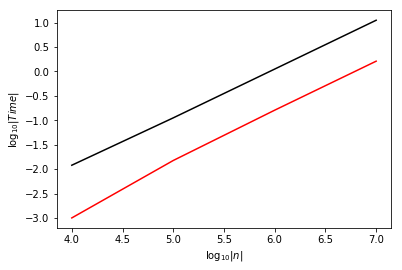

In [60]:
ntest = np.array([1e4,1e5,1e6,1e7])
timess = np.zeros(ntest.size)
timesf = np.zeros(ntest.size)

for jj in xrange(0,ntest.size):
    start = time()
    dumb_variable = fun_slow(ntest[jj])
    end = time()
    timess[jj] = end - start
        
    start = time()
    dumb_variable = fun_fast(ntest[jj])
    end = time()
    timesf[jj] = end - start
        
plt.plot(np.log10(ntest),np.log10(timess),color='k')
plt.plot(np.log10(ntest),np.log10(timesf),color='r')
plt.xlabel('$\log_{10}|n|$')
plt.ylabel('$\log_{10}|Time|$')

We see from results above that by running the vectorized and non-vectorized code for $n=10^{4}, ~10^{5}, ~ 10^{6}$, and $n=10^{7}$, that the vectorized code is about ten times as fast and that this difference persists across a wide range of $n$-values.  If we try to look at when the break-even point between the two methods occurs, we must look at smaller values of $n$.  Thus we look at the results of the code 

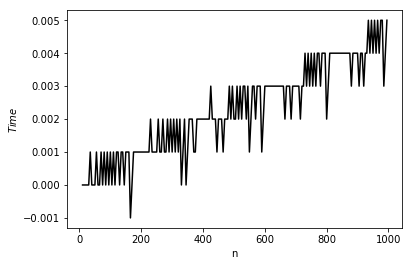

In [39]:
ntest = np.array(range(10,1000,5))
timess = np.zeros(ntest.size)
timesf = np.zeros(ntest.size)

for jj in xrange(0,ntest.size):
    start = time()
    dumb_variable = fun_slow(ntest[jj])
    end = time()
    timess[jj] = end - start
        
    start = time()
    dumb_variable = fun_fast(ntest[jj])
    end = time()
    timesf[jj] = end - start
        
plt.plot(ntest,timess-timesf,color='k')
plt.xlabel('n')
plt.ylabel('$Time$')

Thus we see that for $10\leq n \leq 1000$ that the non-vectorized code is consistently slower than the vectorized code for $n>400$.